## SUPPORT VECTOR MACHINE

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score

In [3]:
# load the data
df = pd.read_csv('mushroom.csv')
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [10]:
df.size

52000

In [12]:
df.shape

(2000, 26)

In [14]:
# to check missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [20]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [22]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['Unnamed: 0', 'stalk_height', 'cap_diameter']

In [24]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [26]:
df[num_col]

Unnamed: 0  stalk_height  cap_diameter
0           1167     14.276173      5.054983
1           1037      3.952715     19.068319
2            309      9.054265      7.205884
3            282      5.226499     20.932692
4            820     14.037532     12.545245
...          ...           ...           ...
1995         863      5.877891     17.464145
1996        1160      6.500840     13.501957
1997         265     13.558064     11.270020
1998         411     11.092703      8.423199
1999        1073     13.066414     21.056642

[2000 rows x 3 columns]

In [28]:
df[cat_col]

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0         distant     broad       pink    tapering  ...   
1         crowded    narrow  chocolate   enlarging  ...   
2         crowded     broad     purple    tapering  ...   
3           close     broad     orange   enlarging  ...   
4         crowded    narrow     orange   enlarging  ...   
...           ...       ...        ...         ...  ...   
1995      crowded    narrow  chocolate    tapering  ...   
1996      distant    narrow        red    tapering  ...   
1997        close    narrow       pink    tapering  ...   
1998        close    narrow     orange   enlarging  ...   
1999        close    narrow     purple   enlarging  ...   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                      gray                 yellow    partial      brown   
1                  cinnamon                  brown  universal      brown   
2                    yellow                   gray  universal     yellow   
3                    yellow                   pink    partial     yellow   
4                      gray                  white  universal      white   
...                     ...                    ...        ...        ...   
1995                   pink                 orange    partial     orange   
1996                   pink                 orange    partial      white   
1997                  brown                    red    partial      brown   
1998                   gray                   pink  universal     yellow   
1999                   gray                  brown    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  
0            two   sheathing         chocolate  clustered    waste  poisonous  
1            two   sheathing             brown   numerous    waste     edible  
2            two   sheathing            purple   abundant    waste  poisonous  
3            two    cobwebby             green  clustered  grasses  poisonous  
4           none        none            yellow  clustered    urban  poisonous  
...          ...         ...               ...        ...      ...        ...  
1995         one     flaring            purple   abundant   leaves  poisonous  
1996         one        zone            yellow   numerous    waste  poisonous  
1997         two  evanescent            yellow   abundant    woods  poisonous  
1998         one    cobwebby             brown   solitary    woods  poisonous  
1999         two       large             white   numerous    urban  poisonous  

[2000 rows x 23 columns]

In [30]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

<Axes: >

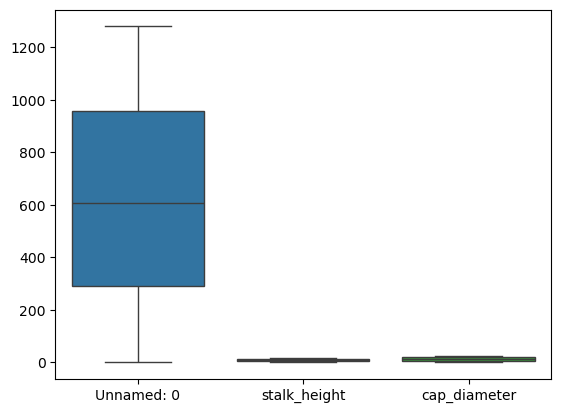

In [32]:
sns.boxplot(df[num_col])

In [34]:
# from the boxplot it is that numerical features have no outliers

In [36]:
Q1s = df['stalk_height'].quantile(0.25)
Q3s = df['stalk_height'].quantile(0.75)
IQRs = Q3s-Q1s
print(Q1s,Q3s,IQRs)

5.2910089106810005 11.781272039772865 6.490263129091865


In [38]:
lower_extremes = Q1s-1.5*IQRs
upper_extremes = Q3s+1.5*IQRs
print(lower_extremes,upper_extremes)

-4.444385782956797 21.516666733410663


In [40]:
outliers_s_df = df[(df['stalk_height']<lower_extremes) | (df['stalk_height']>upper_extremes)]
outliers_s_df

Empty DataFrame
Columns: [Unnamed: 0, cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size, gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, ring_number, ring_type, spore_print_color, population, habitat, class, stalk_height, cap_diameter]
Index: []

[0 rows x 26 columns]

In [42]:
# no outliers in stalk_height, similarly in cap_diameter

In [44]:
Q1c = df['cap_diameter'].quantile(0.25)
Q3c = df['cap_diameter'].quantile(0.75)
IQRc = Q3c-Q1c
print(Q1c,Q3c,IQRc)

5.7235209505112845 18.69860549814206 12.975084547630777


In [46]:
lower_extremec = Q1c-1.5*IQRc
upper_extremec = Q3c+1.5*IQRc
print(lower_extremec,upper_extremec)

-13.73910587093488 38.16123231958822


In [48]:
outliers_c_df = df[(df['cap_diameter']<lower_extremec) | (df['cap_diameter']>upper_extremec)]
outliers_c_df

Empty DataFrame
Columns: [Unnamed: 0, cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size, gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring, stalk_color_below_ring, veil_type, veil_color, ring_number, ring_type, spore_print_color, population, habitat, class, stalk_height, cap_diameter]
Index: []

[0 rows x 26 columns]

In [50]:
# it is clear that no outliers present in num_col

array([[<Axes: title={'center': 'stalk_height'}>]], dtype=object)

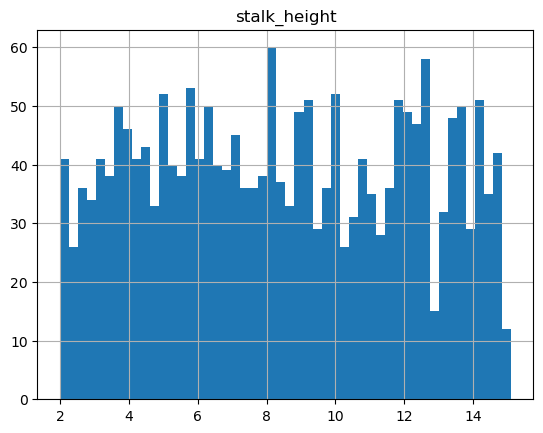

In [52]:
df.hist('stalk_height',bins=50)

array([[<Axes: title={'center': 'cap_diameter'}>]], dtype=object)

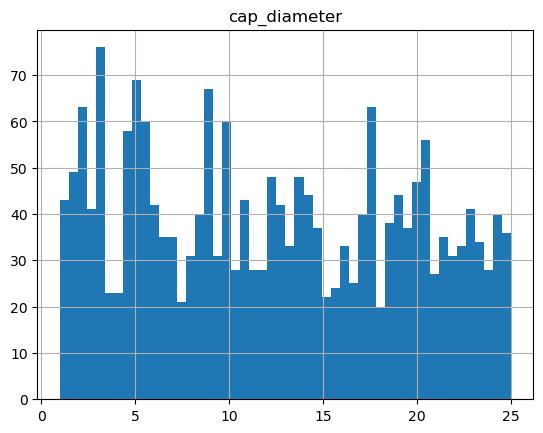

In [53]:
df.hist('cap_diameter',bins=50)

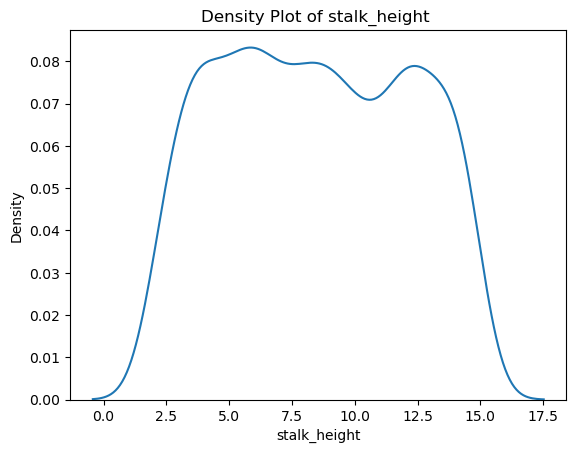

In [55]:
# Density plot of Stalk_height
sns.kdeplot(data=df,x='stalk_height')
plt.title('Density Plot of stalk_height ')
plt.xlabel('stalk_height')
plt.ylabel('Density')
plt.show()

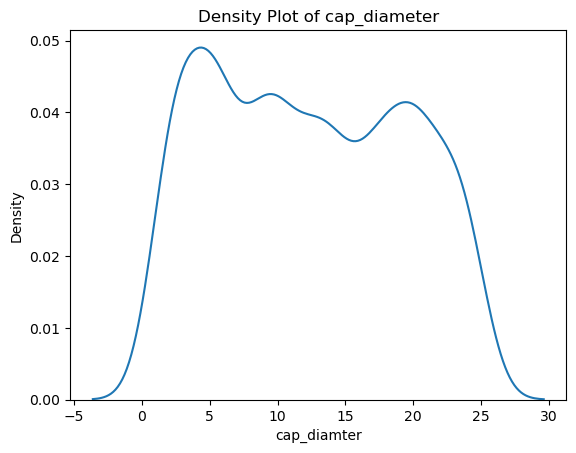

In [57]:
# Density plot of cap_diameter
sns.kdeplot(data=df,x='cap_diameter')
plt.title('Density Plot of cap_diameter')
plt.xlabel('cap_diamter')
plt.ylabel('Density')
plt.show()

In [59]:
corr=df[num_col].corr()
corr

Unnamed: 0  stalk_height  cap_diameter
Unnamed: 0      1.000000     -0.001508      0.051881
stalk_height   -0.001508      1.000000     -0.003486
cap_diameter    0.051881     -0.003486      1.000000

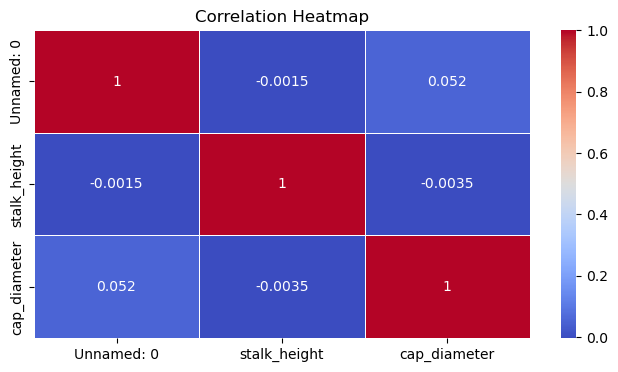

In [62]:
# correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# Encode cat_col

In [66]:
label_encode=LabelEncoder()

In [68]:
for column in df.columns:
    df[column] = label_encode.fit_transform(df[column])

In [70]:
df

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0            889          4            2          7        0     1   
1            786          4            0          6        0     1   
2            246          3            1          5        1     4   
3            221          0            2          4        1     3   
4            630          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         656          4            2          0        1     4   
1996         885          4            2          5        1     5   
1997         205          2            1          3        1     3   
1998         329          0            3          7        0     7   
1999         814          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1           916           190  
1           5      0           128           750  
2           5      1           537           281  
3           0      1           234           829  
4           4      1           895           484  
...       ...    ...           ...           ...  
1995        1      1           283           680  
1996        5      1           335           521  
1997        6      1           859           438  
1998        6      1           679           320  
1999        4      1           825           832  

[2000 rows x 26 columns]

In [72]:
target = df[['class']]
target

class
0         1
1         0
2         1
3         1
4         1
...     ...
1995      1
1996      1
1997      1
1998      1
1999      1

[2000 rows x 1 columns]

In [74]:
features = df.drop(columns='class')
features

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0            889          4            2          7        0     1   
1            786          4            0          6        0     1   
2            246          3            1          5        1     4   
3            221          0            2          4        1     3   
4            630          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         656          4            2          0        1     4   
1996         885          4            2          5        1     5   
1997         205          2            1          3        1     3   
1998         329          0            3          7        0     7   
1999         814          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                   1             2          0           7  ...   
1                   3             1          1           3  ...   
2                   1             1          0           8  ...   
3                   3             0          0           6  ...   
4                   2             1          1           6  ...   
...               ...           ...        ...         ...  ...   
1995                0             1          1           3  ...   
1996                0             2          1           9  ...   
1997                3             0          1           7  ...   
1998                2             0          1           6  ...   
1999                1             0          1           8  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1995                       4          0           1            1          2   
1996                       4          0           2            1          7   
1997                       6          0           0            2          1   
1998                       5          1           3            1          0   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
0                     3           1        5           916           190  
1                     1           2        5           128           750  
2                     6           0        5           537           281  
3                     4           1        0           234           829  
4                     8           1        4           895           484  
...                 ...         ...      ...           ...           ...  
1995                  6           0        1           283           680  
1996                  8           2        5           335           521  
1997                  8           0        6           859           438  
1998                  1           5        6           679           320  
1999                  7           2        4           825           832  

[2000 rows x 25 columns]

In [76]:
target.value_counts()

class
1        1400
0         600
dtype: int64

In [78]:
# split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

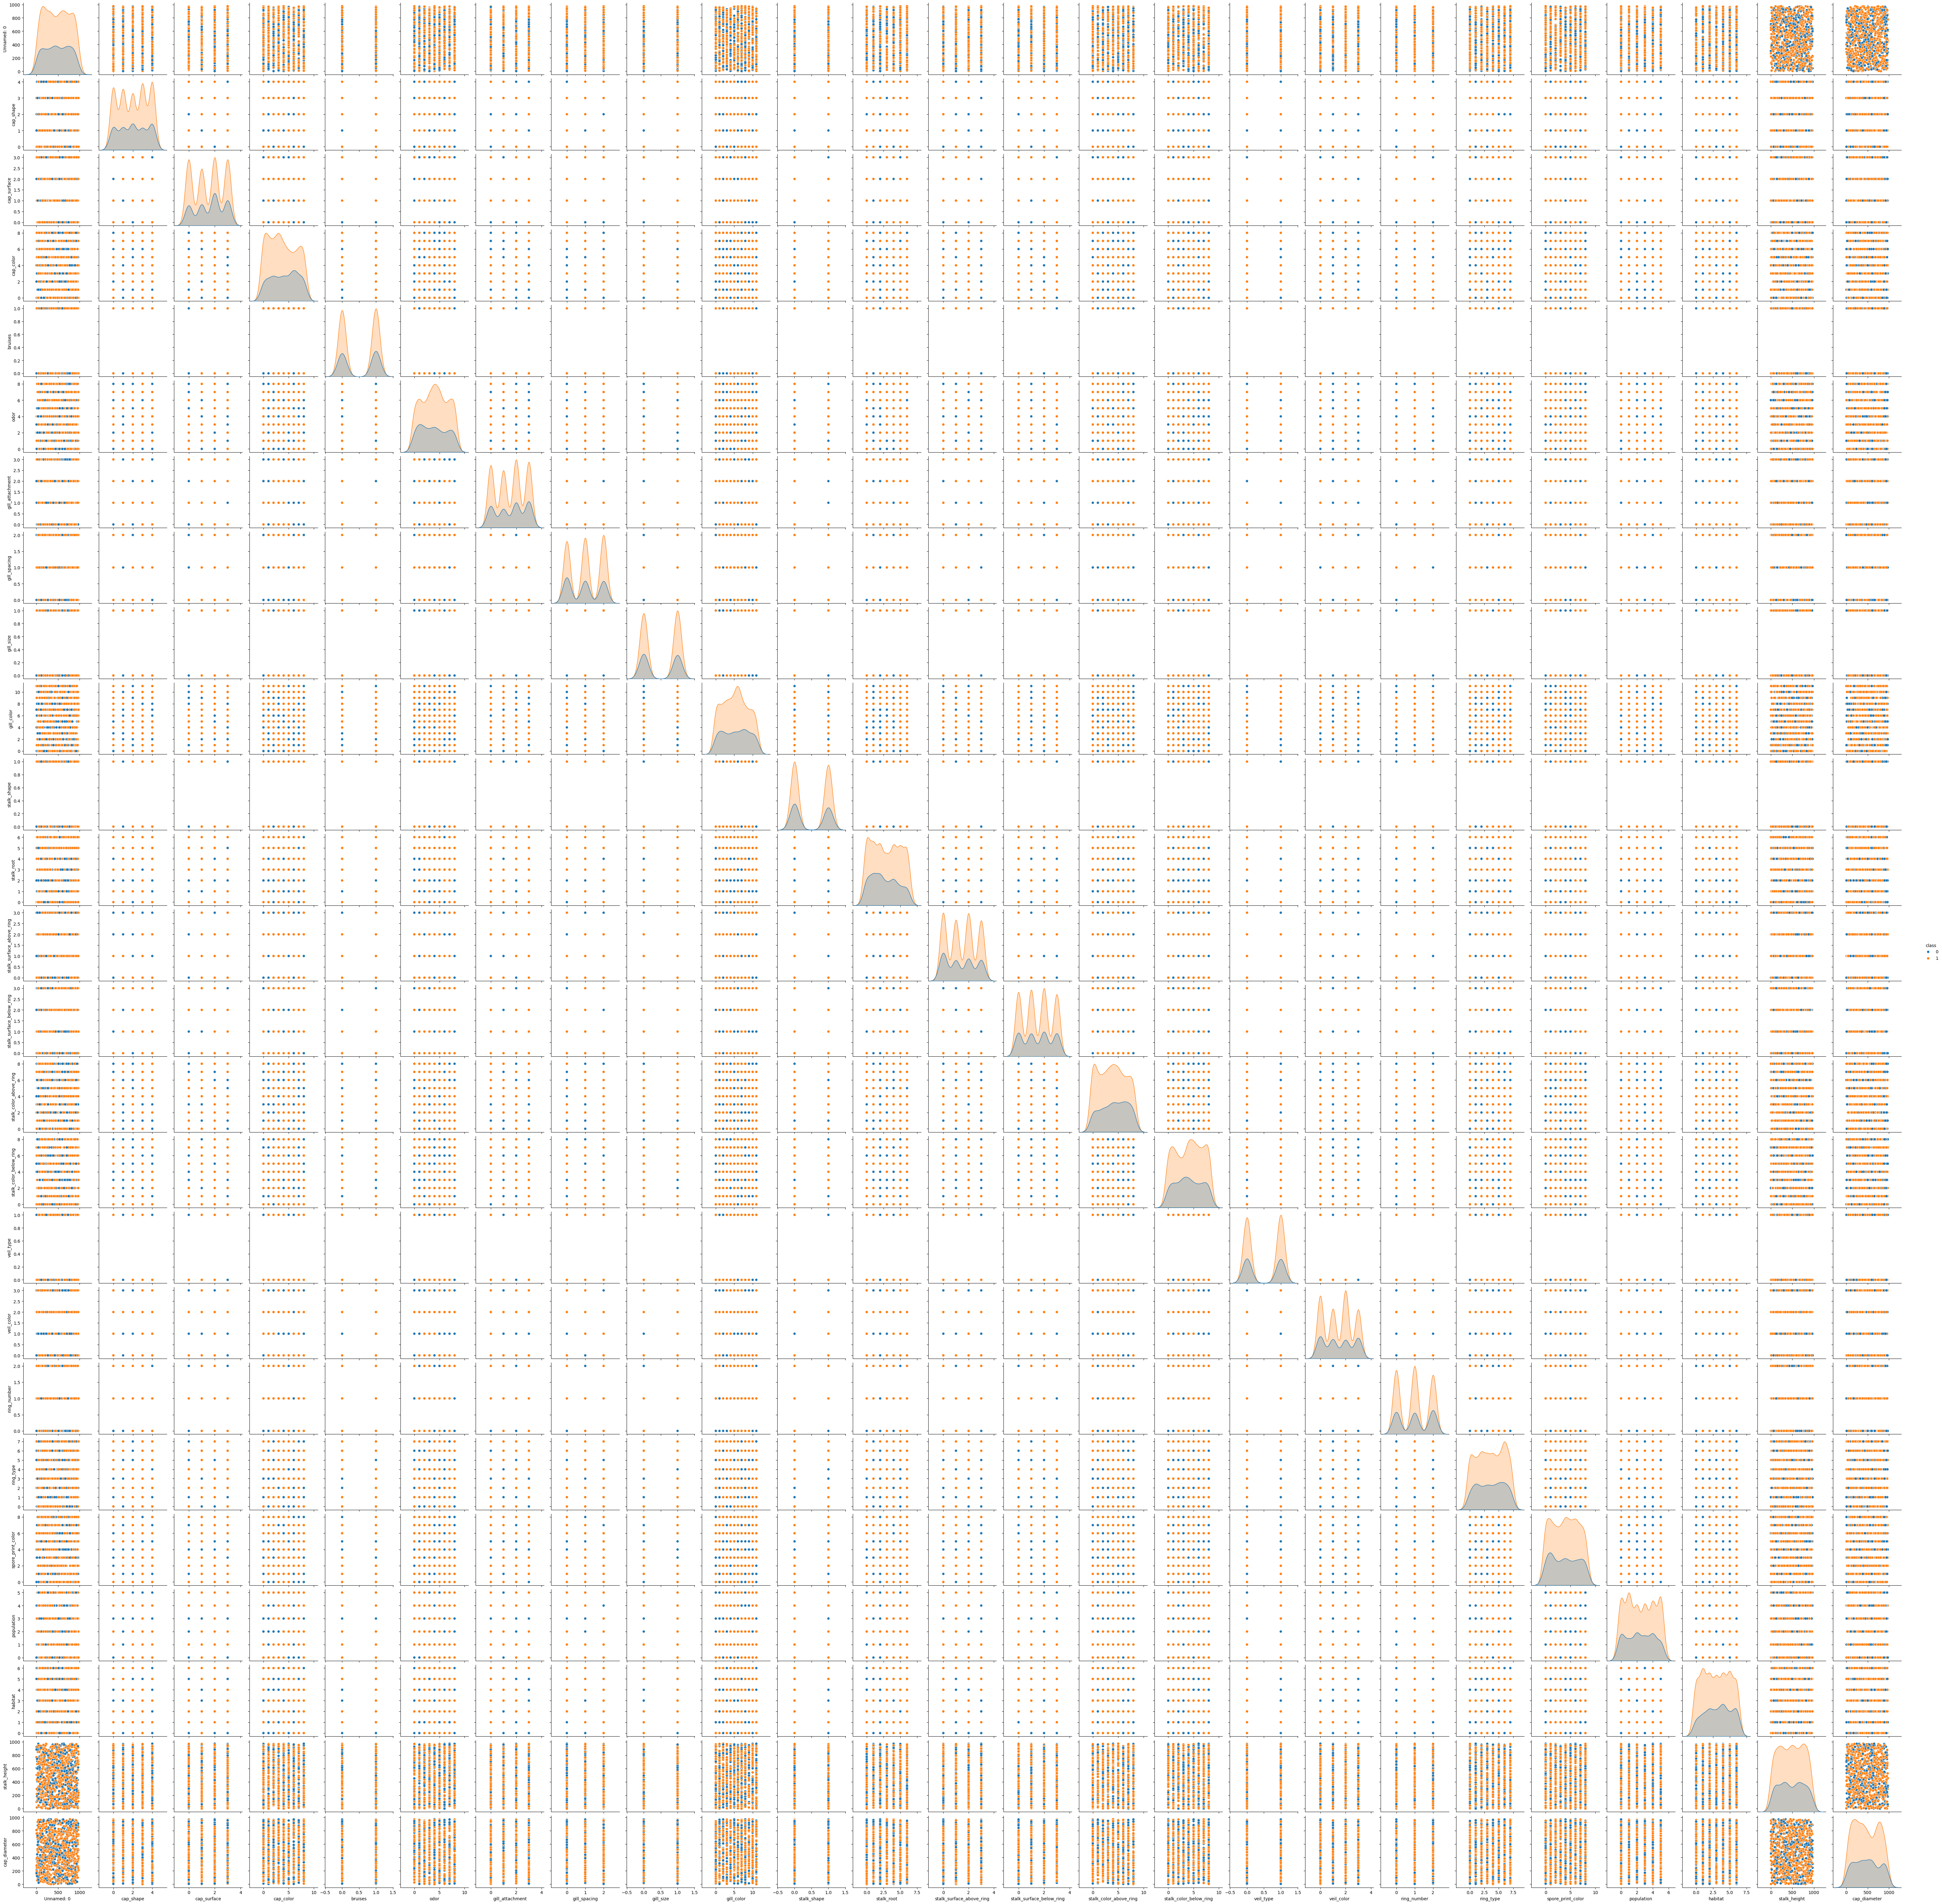

In [80]:
# Pair plot
sns.pairplot(df, hue='class') 
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
# scaling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# SVM Implementation

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.3)

In [103]:
svc.fit(x_train,y_train)

SVC(gamma=0.3)

In [105]:
y_pred=svc.predict(x_test)

In [107]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [94]:
accuracy_score(y_test,y_pred)

0.86

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       171
           1       0.82      1.00      0.90       329

    accuracy                           0.86       500
   macro avg       0.91      0.80      0.82       500
weighted avg       0.88      0.86      0.85       500



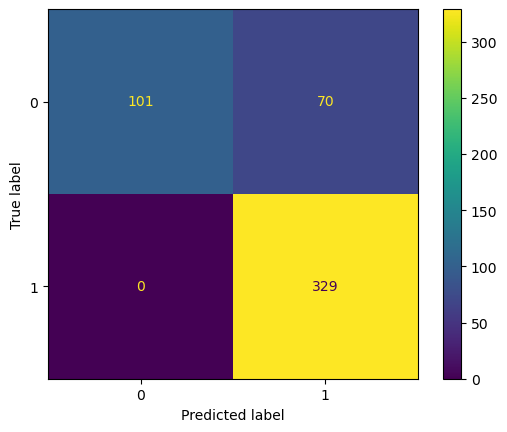

In [111]:
# Visualization of SVM Results
ConfusionMatrixDisplay.from_estimator(svc,x_test,y_test)
plt.show()

In [ ]:
# Parameter Tuning and Optimization

In [113]:
params={'C':[1,2,3,4,5],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[0.1,0.3,0.5,0.6]}

In [115]:
grid_search=GridSearchCV(svc,params)

In [117]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(gamma=0.3),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.1, 0.3, 0.5, 0.6],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [118]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [125]:
# Comparing and analysis

In [123]:
for kernel in ['linear','poly','rbf']:
    svm=SVC(kernel=kernel)
    svm.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}\n")

Kernel: linear
Accuracy: 0.86
Precision: 0.884561403508772
Recall: 0.86
F1 Score: 0.8487160633484163

Kernel: poly
Accuracy: 0.86
Precision: 0.884561403508772
Recall: 0.86
F1 Score: 0.8487160633484163

Kernel: rbf
Accuracy: 0.86
Precision: 0.884561403508772
Recall: 0.86
F1 Score: 0.8487160633484163



In [127]:
# strength
# Effective in High-Dimensional Spaces
# SVMs with non-linear kernels (e.g., radial basis function (RBF)) can handle cases where classes are not linearly separable. 
# Effective for Binary Classification

In [131]:
# weakness
# Challenges with Categorical Data
# High Computational cost
# Sensitive to Parameter Selection

In [133]:
# SVMs are highly effective when there is a clear margin of separation between classes, making them ideal for binary classification problems with distinct boundaries (e.g., disease diagnosis as positive or negative, spam email detection).
# SVMs perform well on datasets with a high number of features, which is common in fields like text classification, bioinformatics, and image recognition.
# The algorithm's ability to work efficiently in high-dimensional spaces reduces the need for extensive feature selection.
# When classes overlap significantly or data is noisy, SVMs may struggle to find a suitable decision boundary, leading to reduced performance.
# SVM is not typically robust against noisy data because misclassified samples near the decision boundary may impact the classifier's accuracy.